Agglomerative Clusters: [0 0 1 0 0 0 2 0 0 2]
Divisive Clusters: [0 1 2 3 4 5 6 7 8 6]


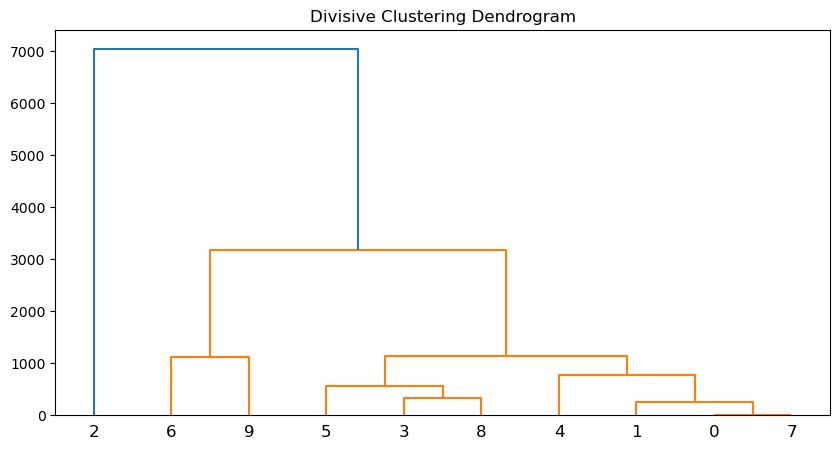

  Bird_ID      Species  Wingspan (cm)  Beak Length (cm)  Weight (g)  \
0    B001        Robin             20               2.0          50   
1    B002       Parrot             40               5.0         300   
2    B003        Eagle            200               8.0        5000   
3    B004  Hummingbird             10               1.0           5   
4    B005          Owl            150               6.0         800   
5    B006      Penguin             45               3.0         400   
6    B007         Hawk            180              10.0        2500   
7    B008      Sparrow             30               2.5          40   
8    B009         Duck             60               4.0         150   
9    B010         Swan            200               8.0        1500   

   Migration Distance (km)  Lifespan (years)  
0                        0                 2  
1                        0                50  
2                     5000                30  
3                      800    

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

data = {
    'Bird_ID': ['B001', 'B002', 'B003', 'B004', 'B005', 'B006', 'B007', 'B008', 'B009', 'B010'],
    'Species': ['Robin', 'Parrot', 'Eagle', 'Hummingbird', 'Owl', 'Penguin', 'Hawk', 'Sparrow', 'Duck', 'Swan'],
    'Wingspan (cm)': [20, 40, 200, 10, 150, 45, 180, 30, 60, 200],
    'Beak Length (cm)': [2, 5, 8, 1, 6, 3, 10, 2.5, 4, 8],
    'Weight (g)': [50, 300, 5000, 5, 800, 400, 2500, 40, 150, 1500],
    'Migration Distance (km)': [0, 0, 5000, 800, 0, 1000, 2000, 0, 500, 1500],
    'Lifespan (years)': [2, 50, 30, 5, 15, 20, 25, 3, 10, 25],
}

bird_dataset = pd.DataFrame(data)

X = bird_dataset[['Wingspan (cm)', 'Beak Length (cm)', 'Weight (g)', 'Migration Distance (km)', 'Lifespan (years)']].values

# Agglomerative clustering
def agglomerative_clustering(X, n_clusters):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = model.fit_predict(X)
    return clusters

# Divisive clustering using hierarchical linkage
def divisive_clustering(X, n_clusters):
    linkage_matrix = linkage(X, method='complete')
    
    clusters = []
    for i in range(len(X)):
        clusters.append(i)
    
    for i in range(len(linkage_matrix)-n_clusters):
        max_index = np.argmax(linkage_matrix[:, 2])
        cluster1, cluster2 = int(linkage_matrix[max_index, 0]), int(linkage_matrix[max_index, 1])
        for j in range(len(clusters)):
            if clusters[j] == cluster2:
                clusters[j] = cluster1
        
        linkage_matrix = np.delete(linkage_matrix, max_index, axis=0)
    
    return np.array(clusters)

n_clusters = 3

# Agglomerative clustering
agglomerative_clusters = agglomerative_clustering(X, n_clusters)
print("Agglomerative Clusters:", agglomerative_clusters)

# Divisive clustering
divisive_clusters = divisive_clustering(X, n_clusters)
print("Divisive Clusters:", divisive_clusters)

plt.figure(figsize=(10, 5))
dendrogram(linkage(X, method='complete'))
plt.title('Divisive Clustering Dendrogram')
plt.show()

print(bird_dataset)


Do you want to view data:


 yes


,Name,Warm_blooded,Give_birth,Aquatic_creature,Aerial_reature,Has_legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,frog,0,0,1,0,1,1,amphibians
3,komodo,0,0,0,0,1,0,reptiles
4,bat,1,1,0,1,1,1,mammals
5,pigeon,1,0,0,1,1,0,birds
6,cat,1,1,0,0,1,0,mammals
7,leopard shark,0,1,1,0,0,0,fishes
8,turtle,0,0,1,0,1,0,reptiles
9,penguin,1,0,1,0,1,0,birds


Your data is ready!
Select your option:
1.single_Link
2.Complete_Link
3.Group_average
4.Centroid
5.Ward


 4


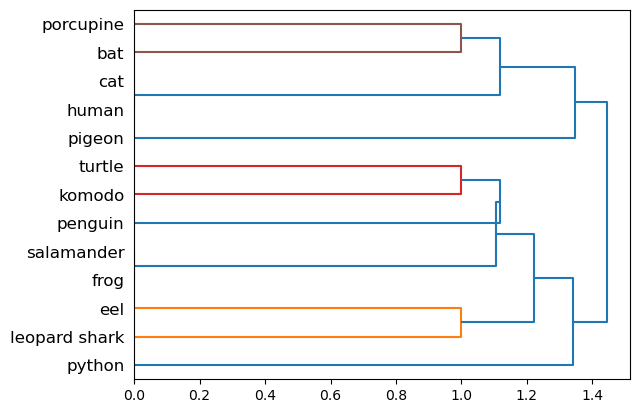

In [5]:
#agglomerative
import pandas as pd
from IPython.display import display_html
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

def toy_dataset():
    animal = [['human',1, 1, 0, 0,1,0,'mammals'],['python',0,0,0,0,0,1,'reptiles'],
              ['frog',0,0,1,0,1,1,'amphibians'],['komodo',0,0,0,0,1,0,'reptiles'],
              ['bat',1,1,0,1,1,1,'mammals'],['pigeon',1,0,0,1,1,0,'birds'],
              ['cat',1,1,0,0,1,0,'mammals'],['leopard shark',0,1,1,0,0,0,'fishes'],
              ['turtle',0,0,1,0,1,0,'reptiles'],['penguin',1,0,1,0,1,0,'birds'],
              ['porcupine',1,1,0,0,1,1,'mammals'],['eel',0,0,1,0,0,0,'fishes'],
              ['salamander',0,0,1,0,1,1,'amphibians']]
    titles=['Name','Warm_blooded','Give_birth','Aquatic_creature','Aerial_reature','Has_legs', 'Hibernates', 'Class']
    data = pd.DataFrame(animal,columns=titles)
    print("Do you want to view data:")
    choice=input()
    if choice=='yes':
        display_html(data)
    return data

def ward(names,X,Y):
    Z = hierarchy.linkage(X.values, 'ward')
    dn = hierarchy.dendrogram (Z,labels=names.tolist(), orientation='right')

def centroid(names,X,Y):
    Z = hierarchy.linkage(X.values, 'centroid')
    dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

def group_average(names,X,Y):
    Z = hierarchy.linkage(X.values, 'average')
    dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='right')

def complete_link(names,X,Y):
    Z = hierarchy.linkage(X.values, 'complete')
    dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='right')

def single_link(names, X, Y):
    Z = hierarchy.linkage(X.values, 'single')
    print("Dendrogram of single link Hierarchical clustering:")
    dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='right')

def main():
    data = toy_dataset()
    names = data['Name']
    Y = data['Class']
    X = data.drop(['Name','Class'],axis=1)
    print("Your data is ready!")
    print("Select your option:\n1.single_Link\n2.Complete_Link\n3.Group_average\n4.Centroid\n5.Ward")
    choice = int(input())
    if choice == 1:
        single_link(names, X, Y)
    elif choice == 2:
        complete_link(names, X, Y)
    elif choice == 3:
        group_average(names, X, Y)
    elif choice == 4:
        centroid(names, X, Y)
    elif choice == 5:
        ward(names, X, Y)
    else:
        print("Enter correct choice next time")
        quit()

main()

In [7]:
import pandas as pd
from IPython.display import display_html
from sklearn.cluster import KMeans

def toy_dataset():
    animal = [['human', 1, 1, 0, 0, 1, 0, 'mammals'],
              ['python', 0, 0, 0, 0, 0, 1, 'reptiles'],
              ['frog', 0, 0, 1, 0, 1, 1, 'amphibians'],
              ['komodo', 0, 0, 0, 0, 1, 0, 'reptiles'],
              ['bat', 1, 1, 0, 1, 1, 1, 'mammals'],
              ['pigeon', 1, 0, 0, 1, 1, 0, 'birds'],
              ['cat', 1, 1, 0, 0, 1, 0, 'mammals'],
              ['leopard shark', 0, 1, 1, 0, 0, 0, 'fishes'],
              ['turtle', 0, 0, 1, 0, 1, 0, 'reptiles'],
              ['penguin', 1, 0, 1, 0, 1, 0, 'birds'],
              ['porcupine', 1, 1, 0, 0, 1, 1, 'mammals'],
              ['eel', 0, 0, 1, 0, 0, 0, 'fishes'],
              ['salamander', 0, 0, 1, 0, 1, 1, 'amphibians']]
    titles = ['Name', 'Warm_blooded', 'Give_birth', 'Aquatic_creature', 'Aerial_reature', 'Has_legs', 'Hibernates', 'Class']
    data = pd.DataFrame(animal, columns=titles)
    print("Do you want to view data:")
    choice = input()
    if choice == 'yes':
        display_html(data)
    return data

def divisive(names, X, Y):
    kmeans = KMeans(n_clusters=2, random_state=42)
    labels = kmeans.fit_predict(X)

    cluster1 = [names[i] for i in range(len(names)) if labels[i] == 0]
    cluster2 = [names[i] for i in range(len(names)) if labels[i] == 1]

    print("Cluster 1:", cluster1)
    print("Cluster 2:", cluster2)

def main():
    data = toy_dataset()
    names = data['Name']
    Y = data['Class']
    X = data.drop(['Name', 'Class'], axis=1)
    print("Your data is ready!")
    print("Performing divisive clustering...")
    divisive(names, X, Y)

main()


Do you want to view data:


 yes


,Name,Warm_blooded,Give_birth,Aquatic_creature,Aerial_reature,Has_legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,frog,0,0,1,0,1,1,amphibians
3,komodo,0,0,0,0,1,0,reptiles
4,bat,1,1,0,1,1,1,mammals
5,pigeon,1,0,0,1,1,0,birds
6,cat,1,1,0,0,1,0,mammals
7,leopard shark,0,1,1,0,0,0,fishes
8,turtle,0,0,1,0,1,0,reptiles
9,penguin,1,0,1,0,1,0,birds


Your data is ready!
Performing divisive clustering...


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 1: ['human', 'bat', 'pigeon', 'cat', 'porcupine']
Cluster 2: ['python', 'frog', 'komodo', 'leopard shark', 'turtle', 'penguin', 'eel', 'salamander']


Do you want to view data:


 yes


,Name,Warm_blooded,Give_birth,Aquatic_creature,Aerial_reature,Has_legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,frog,0,0,1,0,1,1,amphibians
3,komodo,0,0,0,0,1,0,reptiles
4,bat,1,1,0,1,1,1,mammals
5,pigeon,1,0,0,1,1,0,birds
6,cat,1,1,0,0,1,0,mammals
7,leopard shark,0,1,1,0,0,0,fishes
8,turtle,0,0,1,0,1,0,reptiles
9,penguin,1,0,1,0,1,0,birds


Your data is ready!
1. Agglomerative Clustering
Select your option for Agglomerative clustering:
1. Single_Link
2. Complete_Link
3. Group_average
4. Centroid
5. Ward


 4



2. Divisive Clustering


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 1: ['human', 'bat', 'pigeon', 'cat', 'porcupine']
Cluster 2: ['python', 'frog', 'komodo', 'leopard shark', 'turtle', 'penguin', 'eel', 'salamander']


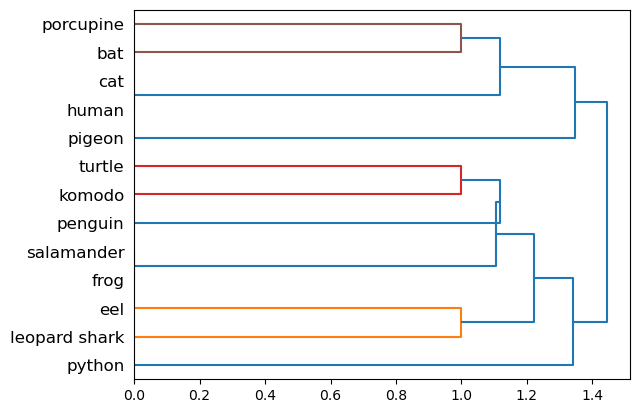

In [12]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
import pandas as pd
from IPython.display import display_html
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans

def toy_dataset():
    animal = [['human',1, 1, 0, 0,1,0,'mammals'],
              ['python',0,0,0,0,0,1,'reptiles'],
              ['frog',0,0,1,0,1,1,'amphibians'],
              ['komodo',0,0,0,0,1,0,'reptiles'],
              ['bat',1,1,0,1,1,1,'mammals'],
              ['pigeon',1,0,0,1,1,0,'birds'],
              ['cat',1,1,0,0,1,0,'mammals'],
              ['leopard shark',0,1,1,0,0,0,'fishes'],
              ['turtle',0,0,1,0,1,0,'reptiles'],
              ['penguin',1,0,1,0,1,0,'birds'],
              ['porcupine',1,1,0,0,1,1,'mammals'],
              ['eel',0,0,1,0,0,0,'fishes'],
              ['salamander',0,0,1,0,1,1,'amphibians']]
    titles=['Name','Warm_blooded','Give_birth','Aquatic_creature','Aerial_reature','Has_legs', 'Hibernates', 'Class']
    data = pd.DataFrame(animal,columns=titles)
    print("Do you want to view data:")
    choice=input()
    if choice=='yes':
        display_html(data)
    return data

def agglomerative(names, X, Y):
    print("Select your option for Agglomerative clustering:")
    print("1. Single_Link\n2. Complete_Link\n3. Group_average\n4. Centroid\n5. Ward")
    choice = int(input())
    if choice == 1:
        Z = hierarchy.linkage(X.values, 'single')
    elif choice == 2:
        Z = hierarchy.linkage(X.values, 'complete')
    elif choice == 3:
        Z = hierarchy.linkage(X.values, 'average')
    elif choice == 4:
        Z = hierarchy.linkage(X.values, 'centroid')
    elif choice == 5:
        Z = hierarchy.linkage(X.values, 'ward')
    else:
        print("Enter correct choice next time")
        return

    dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='right')

def divisive(names, X, Y):
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    cluster1 = [names[i] for i in range(len(names)) if labels[i] == 0]
    cluster2 = [names[i] for i in range(len(names)) if labels[i] == 1]

    print("Cluster 1:", cluster1)
    print("Cluster 2:", cluster2)

def main():
    data = toy_dataset()
    names = data['Name']
    Y = data['Class']
    X = data.drop(['Name', 'Class'], axis=1)
    print("Your data is ready!")

    print("1. Agglomerative Clustering")
    agglomerative(names, X, Y)

    print("\n2. Divisive Clustering")
    divisive(names, X, Y)

main()
